**Assignment 4:**

**Multiple Linear Regression**

**Consider the dataset mentioned in Simple Linear Regression assignment solve the following questions:**

**a) Import the dataset in Python environment.**


In [3]:
import pandas as pd        # For data manipulation and analysis, especially with DataFrames
import seaborn as sns     # For data visualization; provides a high-level interface for drawing attractive statistical graphics
import numpy as np        # For numerical computations, including arrays and mathematical functions
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression    # For implementing linear regression models


In [4]:


# Read a CSV (Comma Separated Values) file named "USA_Housing.csv" into a Pandas DataFrame
# The pd.read_csv() function is used to load the data from the specified file path.
# This function automatically infers the data types of each column and assigns appropriate headers
# based on the first row of the CSV file, which should contain the column names.
# The resulting DataFrame (df1) will hold the housing data from the CSV file, 
# allowing for easy data manipulation and analysis.
df1 = pd.read_csv("USA_Housing.csv")


**b) Check the head of your Dataset, and also check out its info() and describe() methods over the dataset.**


In [5]:
# Display the first five rows of the DataFrame df1, which contains the housing data
# The .head() method is used to quickly visualize a small sample of the data,
# making it easier to understand the structure and contents of the DataFrame.
# By default, .head() returns the first five rows, but you can specify a different
# number of rows to display by passing an integer as an argument (e.g., df1.head(10) 
# would return the first ten rows).
df1.head()


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [6]:
# Display a summary of the DataFrame df1 using the .info() method
# The .info() method provides a concise summary of the DataFrame, including:
# - The number of entries (rows) in the DataFrame
# - The number of columns
# - The names of the columns along with their respective data types
# - The number of non-null values in each column, which helps identify missing data
# - The memory usage of the DataFrame
# This information is useful for understanding the structure of the data, 
# assessing data types for potential issues, and planning further data cleaning or analysis.
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# Generate descriptive statistics for the DataFrame df1 using the .describe() method
# The .describe() method provides a summary of the central tendency, dispersion, and shape 
# of the DataFrame's numerical columns. This includes:
# - Count: The number of non-null entries in each column
# - Mean: The average value of each column
# - Standard Deviation (std): A measure of the amount of variation or dispersion of values
# - Minimum (min): The smallest value in each column
# - 25th Percentile (25%): The value below which 25% of the data fall (first quartile)
# - 50th Percentile (50%): The median value of each column
# - 75th Percentile (75%): The value below which 75% of the data fall (third quartile)
# - Maximum (max): The largest value in each column
# This method is useful for getting a quick overview of the distribution of numerical data,
# identifying potential outliers, and understanding the overall statistical characteristics
# of the dataset.
df1.describe()


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928700  9.975771e+05  
50%                        4.050000     36199.406690  1.232669e+06  
75%                        4.490000     42861.290770  1.471210e+06  
max                        6.500000     69621.713380  2.469066e+06

**c) Explore the types of relationships across the entire data set using ‘pairplot’ method of seaborn and comment on
that.**

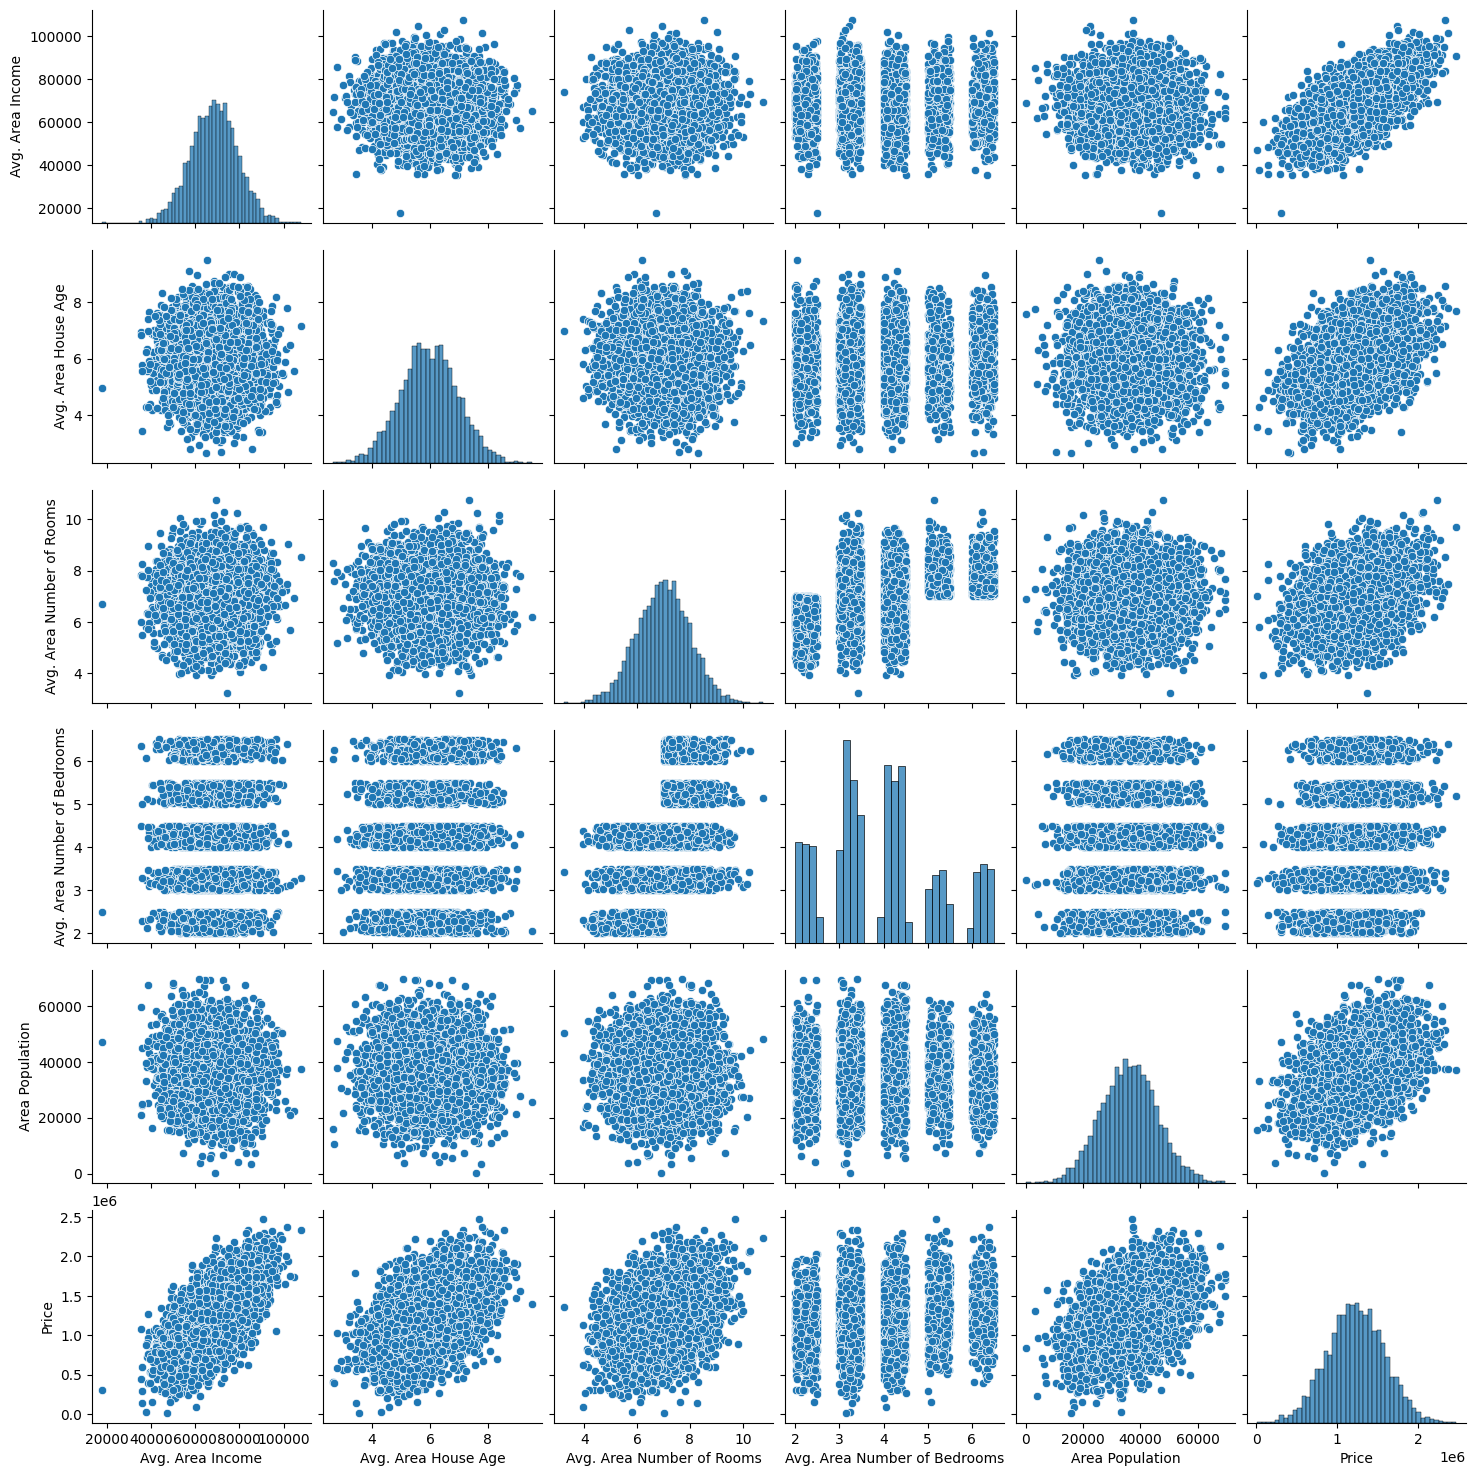

In [8]:
# Create a pairplot of the DataFrame df1 using the Seaborn library
# The sns.pairplot() function visualizes pairwise relationships in the dataset,
# plotting each numerical variable against every other numerical variable in a grid format.
# Key features of the pairplot include:
# - Diagonal Plots: The diagonal plots display the distribution of each variable,
#   usually as a histogram or a kernel density estimate (KDE).
# - Off-Diagonal Plots: The scatter plots in the off-diagonal positions show the
#   relationships between pairs of variables, allowing for the identification of
#   potential correlations or trends.
# - Customization: You can customize the pairplot by passing additional parameters,
#   such as `hue` to color the points by a categorical variable, or `kind` to specify
#   the type of plot for the diagonal (e.g., `kind='kde'` for density plots).
# This visualization is useful for exploring the relationships between multiple
# variables in the dataset, detecting patterns, and identifying possible correlations.
sns.pairplot(df1)


**d) Set a variable X equal to the numerical features of the given dataset and a variable y equal to the "Price" column.**


In [9]:
# Select the features (independent variables) for the model from df1
# X includes five numerical features that are believed to influence housing prices:
# - 'Avg. Area Income': Average income of the area
# - 'Avg. Area House Age': Average age of houses in the area
# - 'Avg. Area Number of Rooms': Average number of rooms per house
# - 'Avg. Area Number of Bedrooms': Average number of bedrooms per house
# - 'Area Population': Total population of the area
X = df1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

# Define the target variable (dependent variable) as 'Price' from df1
# Y is the housing price that we aim to predict based on the features in X
Y = df1['Price']


**e) Split the data into training and testing sets using model_selection.train_test_split from sklearn such that Test set
consists 30% of total data.**

In [10]:
# Split the dataset into training and testing sets using train_test_split from scikit-learn
# The function takes X (features) and Y (target) as inputs and divides them into 
# training and testing subsets. The test_size parameter specifies the proportion 
# of the dataset to include in the test split; here, 30% of the data will be used 
# for testing, while the remaining 70% will be used for training the model.
# This split is essential for evaluating the model's performance on unseen data.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


**f) Train the Linear Regression model based on the Training data after importing LinearRegression from
sklearn.linear_model.**

In [11]:
# Create an instance of the LinearRegression model from scikit-learn
lm1 = LinearRegression()

# Fit the linear regression model to the training data (x_train and y_train)
# The fit() method trains the model by finding the best-fitting line
# that minimizes the difference between the predicted and actual house prices.
# After this step, lm1 will be able to make predictions based on the features in x_train.
lm1.fit(x_train, y_train)


LinearRegression()

**g) Print the coefficients of the trained model. How can you interpret these coefficients?**

In [12]:
# Evaluate the performance of the linear regression model on the test set
# The score() method returns the coefficient of determination (R^2) of the prediction.
# This value indicates how well the model explains the variance in the target variable (y_test).
# A higher R^2 value (closer to 1) signifies a better fit of the model to the data.
print(lm1.score(x_test, y_test))

# Retrieve the intercept (bias) of the linear regression model
# The intercept represents the expected mean value of the target variable 
# when all features are set to zero. It is a key parameter in the linear regression equation.
print(lm1.intercept_)

# Create a DataFrame to display the coefficients of the linear regression model
# The coefficients indicate the relationship between each feature and the target variable.
# A positive coefficient suggests a direct relationship, while a negative coefficient indicates an inverse relationship.
coeff_df = pd.DataFrame(lm1.coef_, X.columns, columns=['Coefficient'])

# Display the DataFrame containing the coefficients for each feature
coeff_df


0.9195185329600813
-2633571.2495987825


Coefficient
Avg. Area Income                  21.709216
Avg. Area House Age           164749.531333
Avg. Area Number of Rooms     119496.825795
Avg. Area Number of Bedrooms    2660.239022
Area Population                   15.119279

**h) Predict the house price of the Test set data and display them.**

In [13]:
# Use the trained linear regression model (lm1) to make predictions on the test set (x_test)
# The predict() method calculates the predicted values of the target variable (house prices)
# based on the features in x_test. This generates an array of predicted prices.
prediction = lm1.predict(x_test)

# Print the array of predicted house prices for the test set
# These predictions can be compared to the actual prices (y_test) to evaluate model performance.
print(prediction)


[1591415.38468871  736145.83645033 1583492.21160845 ... 1318517.92256344
 1317808.79843611 1581987.28165558]


**i) Create a scatterplot of the real test values versus the predicted values.**

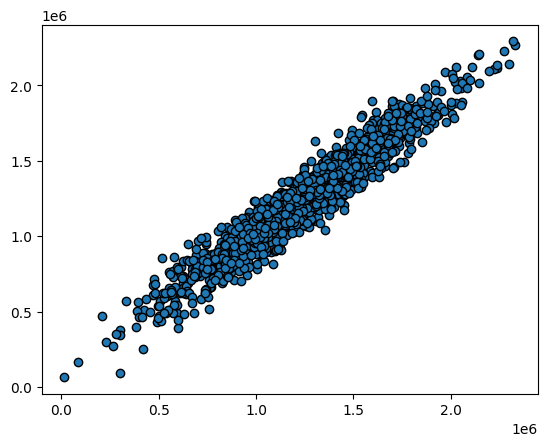

In [14]:
# Create a scatter plot to visualize the relationship between actual prices (y_test) and predicted prices
# (prediction) using Matplotlib. Each point represents a house, with the actual price on the x-axis 
# and the predicted price on the y-axis. The edgecolor='black' parameter adds a black outline 
# to the points, enhancing visibility. This plot helps assess the model's performance by showing 
# how closely the predicted values align with the actual values; ideally, points should cluster 
# around the 45-degree line (y=x), indicating accurate predictions.
plt.scatter(y_test, prediction, edgecolor='black')


**j) Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error to evaluate our
model performance after importing metrics from sklearn.**


In [15]:
# Import the metrics module from scikit-learn to evaluate the model's performance
from sklearn import metrics

# Calculate and print the Mean Absolute Error (MAE)
# MAE measures the average magnitude of errors in a set of predictions, 
# without considering their direction. It provides a clear interpretation 
# of prediction accuracy in the same units as the target variable.
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

# Calculate and print the Mean Squared Error (MSE)
# MSE measures the average of the squares of the errors, emphasizing larger 
# errors more than smaller ones. It is useful for understanding the overall 
# prediction accuracy but is not in the same unit as the target variable.
print('MSE:', metrics.mean_squared_error(y_test, prediction))

# Calculate and print the Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE and provides a measure of error in the 
# same units as the target variable. It is particularly useful for interpreting 
# model performance since it shows the average prediction error magnitude.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 81162.84866535262
MSE: 10243822964.708536
RMSE: 101211.77285626676


**k) Plot a histogram of the residuals. [Use either seaborn distplot, or just plt.hist()].**

C:\Users\Rakib Khan\AppData\Local\Temp\ipykernel_26924\2218583740.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - prediction), bins=50, hist_kws=dict(edgecolor='black', linewidth=1))


<Axes: xlabel='Price', ylabel='Density'>

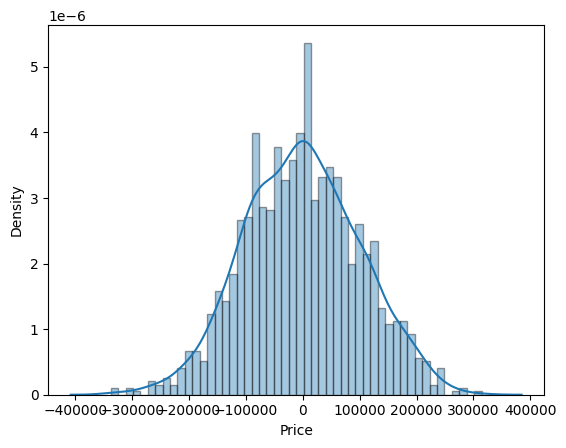

In [16]:
# Create a distribution plot (histogram) of the residuals (errors) using Seaborn
# The residuals are calculated as the difference between actual values (y_test) 
# and predicted values (prediction). This plot helps assess the model's performance 
# by visualizing the distribution of errors.
# - bins=50: Specifies the number of bins for the histogram, allowing for detailed 
#   insight into the distribution of residuals.
# - hist_kws: Additional keyword arguments for the histogram; here, 
#   edgecolor='black' adds a black outline to the bars, and linewidth=1 sets 
#   the width of the edges, enhancing visibility of the distribution.
sns.distplot((y_test - prediction), bins=50, hist_kws=dict(edgecolor='black', linewidth=1))
